In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("inductiveanks/employee-salaries-for-different-job-roles")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/employee-salaries-for-different-job-roles


In [11]:
df = pd.read_csv('/kaggle/input/employee-salaries-for-different-job-roles/ds_salaries.csv')

In [12]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [13]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [14]:
summary_stats = df.describe()
print("\nSummary statistics for numerical columns:")
print(summary_stats)


Summary statistics for numerical columns:
       Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  2021.405272  3.240001e+05  112297.869852      70.92257
std    175.370085     0.692133  1.544357e+06   70957.259411      40.70913
min      0.000000  2020.000000  4.000000e+03    2859.000000       0.00000
25%    151.500000  2021.000000  7.000000e+04   62726.000000      50.00000
50%    303.000000  2022.000000  1.150000e+05  101570.000000     100.00000
75%    454.500000  2022.000000  1.650000e+05  150000.000000     100.00000
max    606.000000  2022.000000  3.040000e+07  600000.000000     100.00000


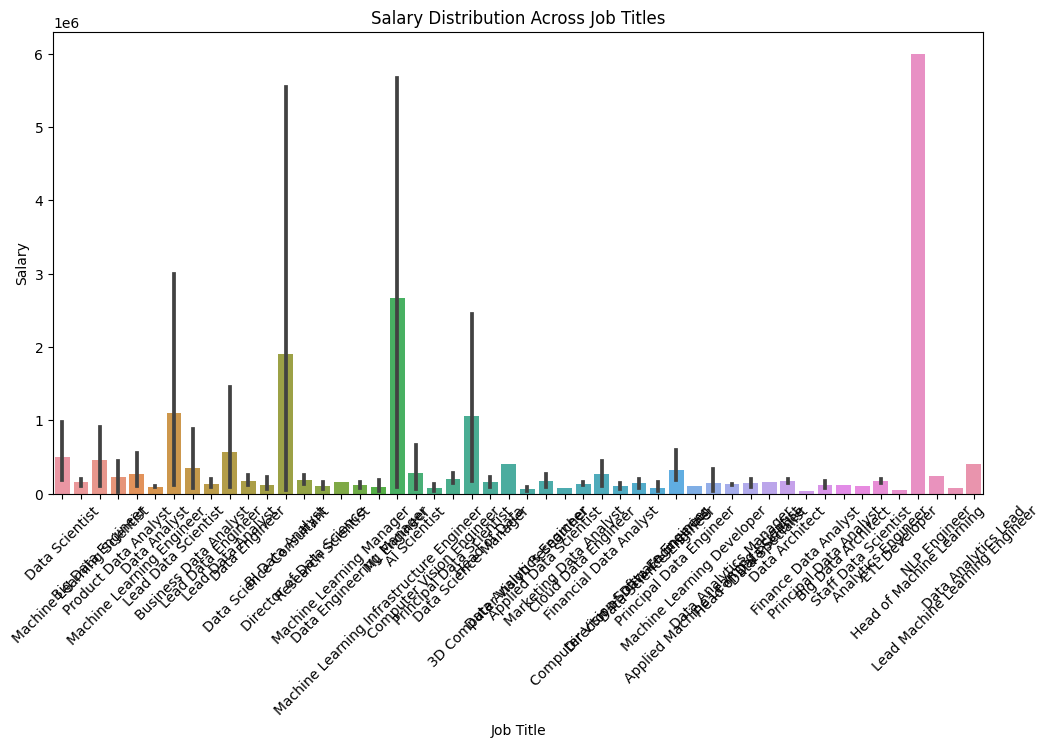

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='job_title', y='salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary Distribution Across Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()

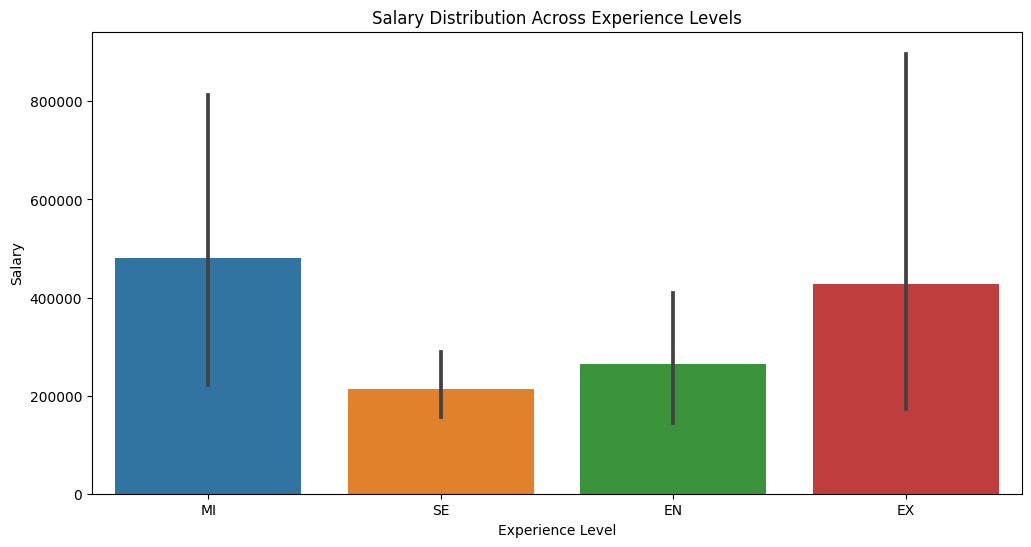

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='experience_level', y='salary', data=df)
plt.title('Salary Distribution Across Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

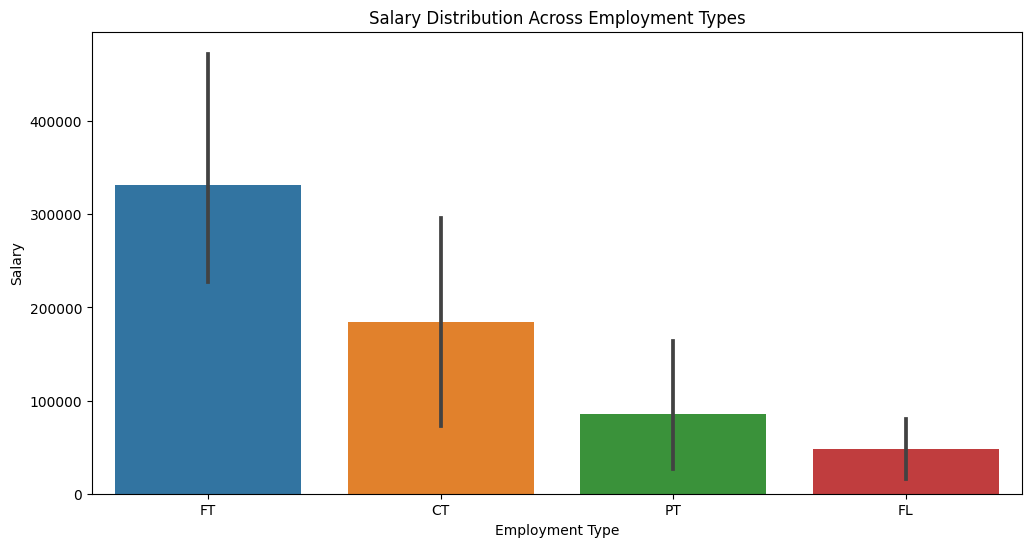

In [17]:

plt.figure(figsize=(12, 6))
sns.barplot(x='employment_type', y='salary', data=df)
plt.title('Salary Distribution Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Salary')
plt.show()

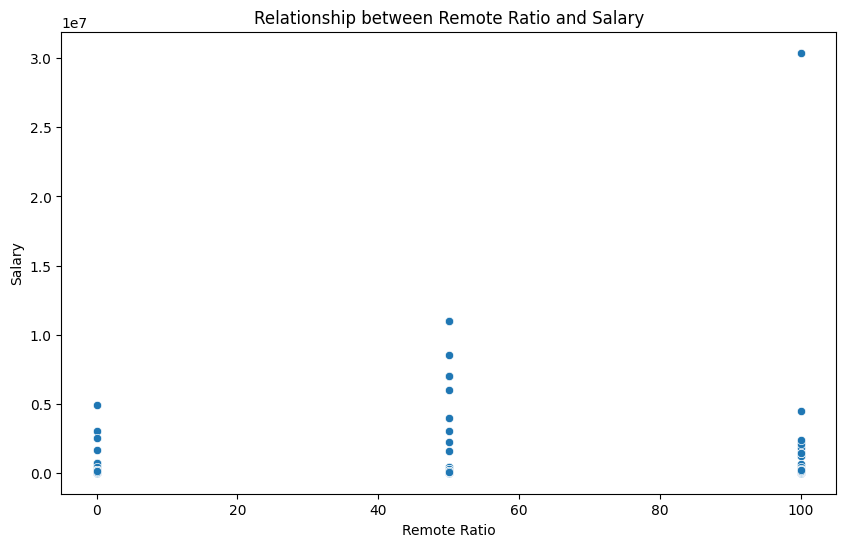

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remote_ratio', y='salary', data=df)
plt.title('Relationship between Remote Ratio and Salary')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
plt.show()

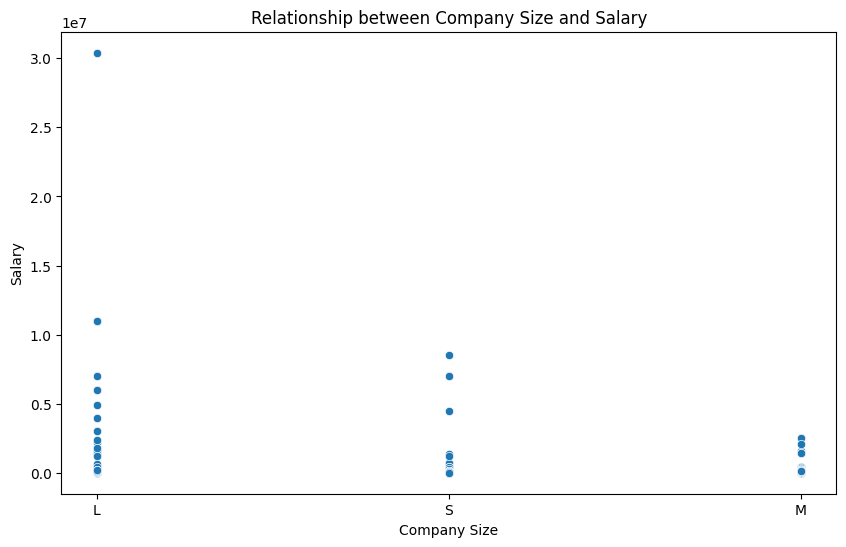

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='company_size', y='salary', data=df)
plt.title('Relationship between Company Size and Salary')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.show()

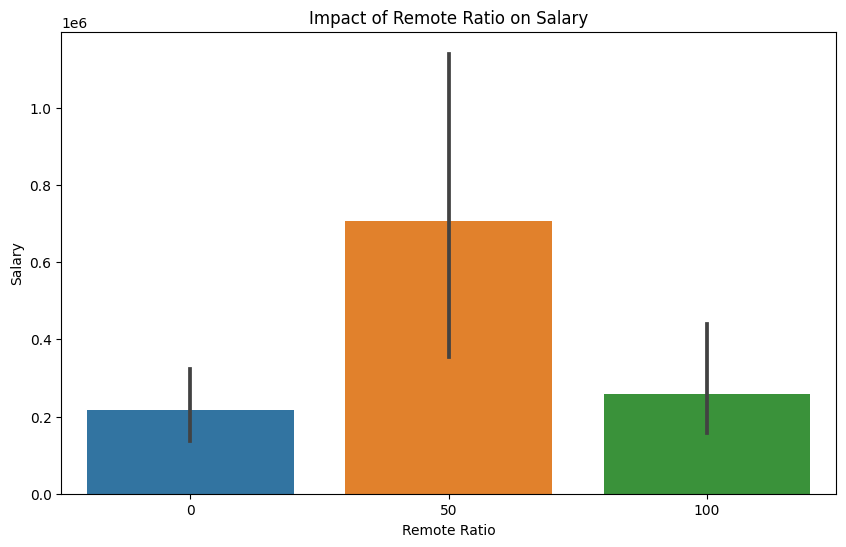

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='remote_ratio', y='salary', data=df)
plt.title('Impact of Remote Ratio on Salary')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
plt.show()

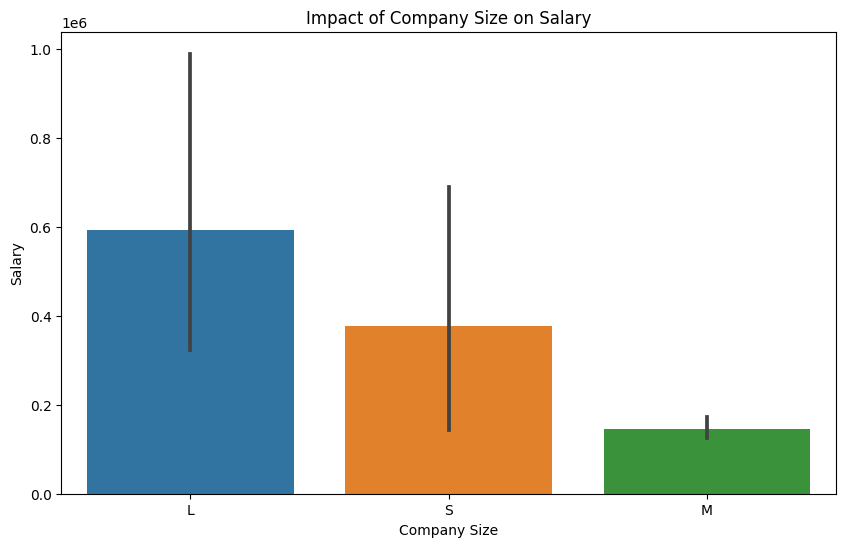

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='company_size', y='salary', data=df)
plt.title('Impact of Company Size on Salary')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.show()

In [22]:
avg_salary_per_title = df.groupby('job_title')['salary'].mean().reset_index()
avg_salary_per_title.rename(columns={'salary': 'avg_salary_per_title'}, inplace=True)
df = df.merge(avg_salary_per_title, on='job_title', how='left')

In [23]:
avg_salary_per_exp = df.groupby('experience_level')['salary'].mean().reset_index()
avg_salary_per_exp.rename(columns={'salary': 'avg_salary_per_experience'}, inplace=True)
df = df.merge(avg_salary_per_exp, on='experience_level', how='left')

In [24]:
X = df[['avg_salary_per_title', 'avg_salary_per_experience']]
y = df['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict salaries on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7911525259556.634


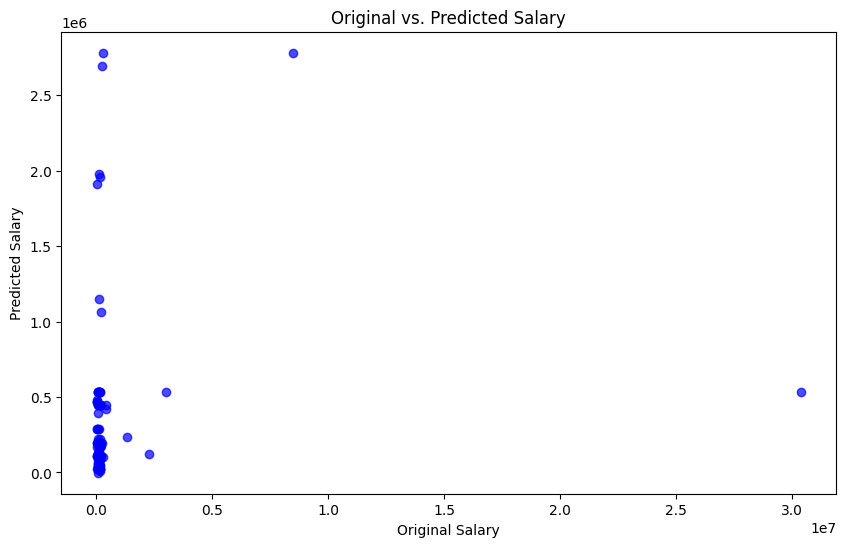

In [26]:
# Create a scatter plot to visualize original vs. predicted salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Original Salary')
plt.ylabel('Predicted Salary')
plt.title('Original vs. Predicted Salary')
plt.show()

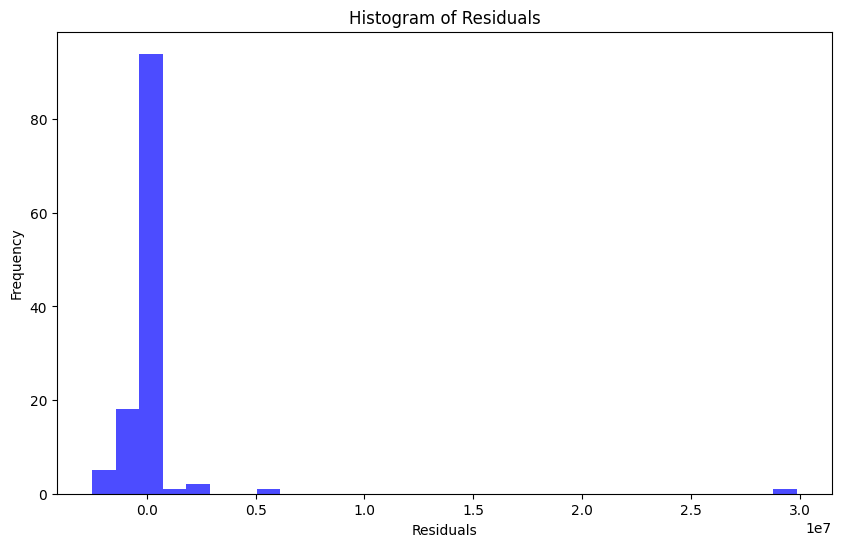

In [27]:
# Plot a histogram of the residuals (difference between original and predicted salaries)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()